# Beijing Air-Quality Time Series Project
### Modeling Time Series

by Dolci Sanders and Paul Torres



In [1]:
# Pandas/Data readers/ etc 
import pandas as pd
import numpy as np
import pickle

# Visuals 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats Models
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# PMDARIMA
import pmdarima
from pmdarima import auto_arima    # for determining ARIMA orders

# Facebook Prophet 
from fbprophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))



Importing plotly failed. Interactive plots will not work.


## Read in pickle, check index for date time

In [2]:
train = pd.read_pickle('PKL/train.pkl')
test = pd.read_pickle('PKL/test.pkl')
time = pd.read_pickle('PKL/time.pkl')

In [3]:
#train.index = pd.DatetimeIndex(train.index).to_period('D')
#test.index = pd.DatetimeIndex(test.index).to_period('D')

## Find Ideal Parameters and then run models:

### Auto Arima and SARIMAX (seasonal arimas) Models
AUTO ARIMA

SARIMAX(2,2,0) MSE Error:  8783.286787840536
SARIMAX(2,2,0) RMSE Error:  93.71919113949147

In [4]:
stepwise_fit = auto_arima(train['PM2.5'], start_p=0, start_q=0,
                         max_p=2, max_q=2, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12619.683, Time=6.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12620.583, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12183.206, Time=3.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12188.912, Time=3.88 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13621.719, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12181.777, Time=0.40 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=12183.237, Time=1.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=12185.222, Time=1.54 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=12138.074, Time=0.32 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=12139.922, Time=1.29 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=12139.927, Time=1.24 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=12141.922, Time=4.55 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=12138.343, Time=2.27 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=12137.123, Time=1.50 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6064.561
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        21:29:11   BIC                          12157.211
Sample:                             0   HQIC                         12144.715
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.1073      4.837     10.772      0.000      42.626      61.588
ar.L1          0.3551      0.035     10.131      0.000       0.286       0.424
ma.L1          0.3352      0.040      8.440      0.000       0.257       0.413
sigma2      2926.6341     80.150     36.515      0.000    2769.543    3083.725
===================================================================================
Ljung-Box (Q):                       37.49   Jarque-Bera (JB):               767.87
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.76
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Above the best model:  ARIMA(1,0,1)(2,0,1)[12] intercept


### Running SARIMAX

In [5]:
model_SARIMAX = SARIMAX(train['PM2.5'],order=(0,0,1))
results = model_SARIMAX.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -6411.858
Date:                Thu, 10 Sep 2020   AIC                          12827.717
Time:                        21:29:11   BIC                          12837.761
Sample:                    03-01-2013   HQIC                         12831.513
                         - 03-25-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7141      0.017     41.123      0.000       0.680       0.748
sigma2      5437.7374    163.820     33.193      0.000    5116.656    5758.819
===================================================================================
Ljung-Box (Q):                      164.96   Jarque-Bera (JB):               696.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.95
Prob(H) (two-sided):                  0.27   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_SARIMAX = results.predict(start=start, end=end, dynamic=False).rename('SARIMAX(0,0,1) Predictions')

In [7]:
for i in range(len(predictions_SARIMAX)):
    print(f"predicted={predictions_SARIMAX[i]:<19}, expected={test['PM2.5'][i]}")


predicted=-2.7263426931381014, expected=12.157457729468598
predicted=0.0                , expected=14.887077294685993
predicted=0.0                , expected=69.37003968253968
predicted=0.0                , expected=17.64017896354853
predicted=0.0                , expected=27.14522946859903
predicted=0.0                , expected=148.48958333333334
predicted=0.0                , expected=42.42942290552585
predicted=0.0                , expected=8.358640755379886
predicted=0.0                , expected=17.71009487457697
predicted=0.0                , expected=72.4798611111111
predicted=0.0                , expected=114.5050681504486
predicted=0.0                , expected=134.6143676673568
predicted=0.0                , expected=87.25252525252525
predicted=0.0                , expected=21.928085199824327
predicted=0.0                , expected=73.91788766788768
predicted=0.0                , expected=54.8873556998557
predicted=0.0                , expected=40.23776781793086
predicted=0.

In [8]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['PM2.5'], predictions_SARIMAX)
print(f'SARIMAX(2,2,0) MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse
error = rmse(test['PM2.5'], predictions_SARIMAX)
print(f'SARIMAX(2,2,0) RMSE Error: {error:18}')


SARIMAX(2,2,0) MSE Error:  8783.286787840536
SARIMAX(2,2,0) RMSE Error:  93.71919113949147


## ARIMA Model 

ARIMA(2,0,1) MSE Error:  3521.981928900528
ARIMA(2,0,1) RMSE Error:  59.34628824872309

In [9]:
auto_arima(train['PM2.5'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6064.561
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        21:29:21   BIC                          12157.211
Sample:                             0   HQIC                         12144.715
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.1073      4.837     10.772      0.000      42.626      61.588
ar.L1          0.3551      0.035     10.131      0.000       0.286       0.424
ma.L1          0.3352      0.040      8.440      0.000       0.257       0.413
sigma2      2926.6341     80.150     36.515      0.000    2769.543    3083.725
===================================================================================
Ljung-Box (Q):                       37.49   Jarque-Bera (JB):               767.87
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.76
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
stepwise_fit = auto_arima(train['PM2.5'], start_p=0, start_q=0,
                         max_p=1, max_q=1, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12619.683, Time=4.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12620.583, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12183.206, Time=2.44 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12188.912, Time=3.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13621.719, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12181.777, Time=0.29 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=12183.237, Time=1.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=12185.222, Time=2.38 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=12137.123, Time=1.79 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=12138.834, Time=4.55 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=12138.846, Time=3.66 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=12141.003, Time=2.66 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=12186.968, Time=1.10 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=12347.377, Time=0.30 sec

Best

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6064.561
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        21:29:50   BIC                          12157.211
Sample:                             0   HQIC                         12144.715
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.1073      4.837     10.772      0.000      42.626      61.588
ar.L1          0.3551      0.035     10.131      0.000       0.286       0.424
ma.L1          0.3352      0.040      8.440      0.000       0.257       0.413
sigma2      2926.6341     80.150     36.515      0.000    2769.543    3083.725
===================================================================================
Ljung-Box (Q):                       37.49   Jarque-Bera (JB):               767.87
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.76
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model_arima = ARIMA(train['PM2.5'],order=(2,0,1))
results = model_arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:                     ARMA(2, 1)   Log Likelihood               -6064.171
Method:                       css-mle   S.D. of innovations             54.080
Date:                Thu, 10 Sep 2020   AIC                          12138.343
Time:                        21:29:51   BIC                          12163.453
Sample:                    03-01-2013   HQIC                         12147.833
                         - 03-25-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.8083      3.241     24.933      0.000      74.456      87.160
ar.L1.PM2.5     0.4917      0.157      3.130      0.002       0.184       0.800
ar.L2.PM2.5    -0.0898      0.097     -0.926      0.354      -0.280       0.100
ma.L1.PM2.5     0.2009      0.157      1.278      0.201      -0.107       0.509
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7385           -1.9081j            3.3376           -0.0969
AR.2            2.7385           +1.9081j            3.3376            0.0969
MA.1           -4.9784           +0.0000j            4.9784            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_arima = results.predict(start=start, end=end, dynamic=False).rename('arima(2,0,1) Predictions')

In [13]:
for i in range(len(predictions_arima)):
    print(f"predicted={predictions_arima[i]:<19}, expected={test['PM2.5'][i]}")

predicted=48.33152142138354  , expected=12.157457729468598
predicted=70.68928610348887  , expected=14.887077294685993
predicted=78.74862081389412  , expected=69.37003968253968
predicted=80.70399246343919  , expected=17.64017896354853
predicted=80.94188430503266  , expected=27.14522946859903
predicted=80.88331482213624  , expected=148.48958333333334
predicted=80.83316411741515  , expected=42.42942290552585
predicted=80.81376514509645  , expected=8.358640755379886
predicted=80.80872954227928  , expected=17.71009487457697
predicted=80.80799518597522  , expected=72.4798611111111
predicted=80.80808617358741  , expected=114.5050681504486
predicted=80.80819682912815  , expected=134.6143676673568
predicted=80.80824306523175  , expected=87.25252525252525
predicted=80.80825586394565  , expected=21.928085199824327
predicted=80.80825800593291  , expected=73.91788766788768
predicted=80.80825791013149  , expected=54.8873556998557
predicted=80.8082576707495   , expected=40.23776781793086
predicted=80

In [14]:
error = mean_squared_error(test['PM2.5'], predictions_arima)
print(f'ARIMA(2,0,1) MSE Error: {error:18}')

error = rmse(test['PM2.5'], predictions_arima)
print(f'ARIMA(2,0,1) RMSE Error: {error:18}')

ARIMA(2,0,1) MSE Error:  3521.981928900528
ARIMA(2,0,1) RMSE Error:  59.34628824872309


## Arima using log of PM2.5 
ARIMA(2,0,1) MSE Error: 0.6466681227364013
ARIMA(2,0,1) RMSE Error: 0.8041567774609634

In [35]:
train['PM2.5'] = np.log(train['PM2.5'])
test['PM2.5'] = np.log(test['PM2.5'])

In [16]:
# keeping the same order, but using the log 
model_arima_log = ARIMA(train['PM2.5'],order=(2,0,1))
results = model_arima_log.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:                     ARMA(2, 1)   Log Likelihood               -1224.366
Method:                       css-mle   S.D. of innovations              0.721
Date:                Thu, 10 Sep 2020   AIC                           2458.731
Time:                        21:29:52   BIC                           2483.841
Sample:                    03-01-2013   HQIC                          2468.222
                         - 03-25-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0511      0.039    104.620      0.000       3.975       4.127
ar.L1.PM2.5     0.6733      0.134      5.020      0.000       0.410       0.936
ar.L2.PM2.5    -0.2128      0.076     -2.804      0.005      -0.361      -0.064
ma.L1.PM2.5    -0.0298      0.137     -0.218      0.827      -0.297       0.238
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5821           -1.4821j            2.1679           -0.1198
AR.2            1.5821           +1.4821j            2.1679            0.1198
MA.1           33.5952           +0.0000j           33.5952            0.0000
-----------------------------------------------------------------------------
"""

In [17]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_arima = results.predict(start=start, end=end, dynamic=False).rename('arima(2,0,1) Predictions')

In [18]:
error = mean_squared_error(test['PM2.5'], predictions_arima)
print(f'ARIMA(2,0,1) MSE Error: {error:18}')

error = rmse(test['PM2.5'], predictions_arima)
print(f'ARIMA(2,0,1) RMSE Error: {error:18}')

ARIMA(2,0,1) MSE Error: 0.6466681227364013
ARIMA(2,0,1) RMSE Error: 0.8041567774609634


## Facebook Prophet
Works best on daily predictions, so we will try to look at this. 
We must change the headers to 'ds' for the dates and the outcome is 'y'. 


In [20]:
fbtrain = pd.read_pickle('PKL/train.pkl')
fbtest = pd.read_pickle('PKL/test.pkl')

In [21]:
fbtrain.head()

,PM2.5
Date,
2013-03-01,7.326389
2013-03-02,31.475694
2013-03-03,79.291667
2013-03-04,21.685855
2013-03-05,130.886905


In [22]:
fbtrain.reset_index(inplace = True)


In [23]:
fbtrain.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)


In [24]:
fbtrain.y = np.log(fbtrain.y)


In [25]:
# Attempt at FaceBook Prophet 

m = Prophet(daily_seasonality = True, changepoint_prior_scale=0.01)
m.fit(fbtrain)
future = m.make_future_dataframe(periods= 365, freq = 'D')
bam = m.predict(future)

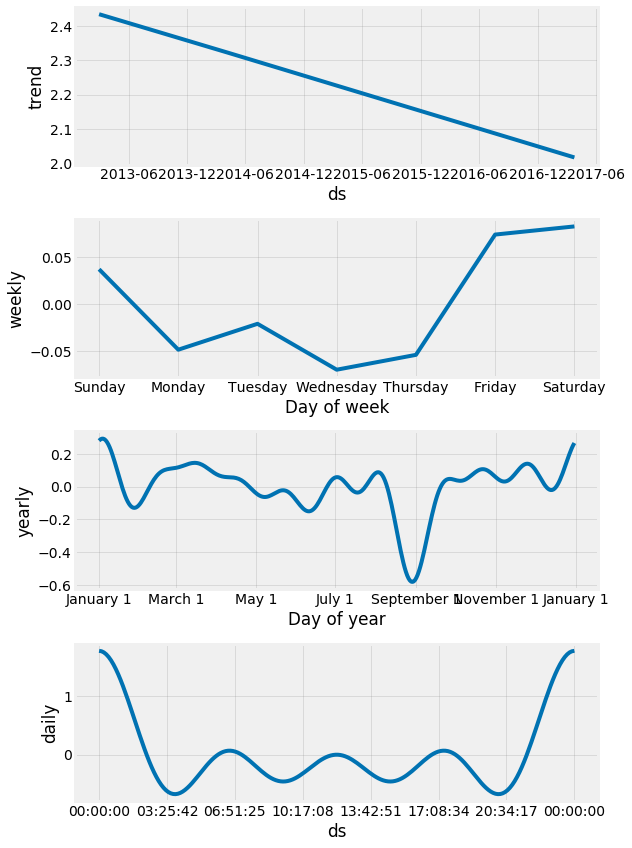

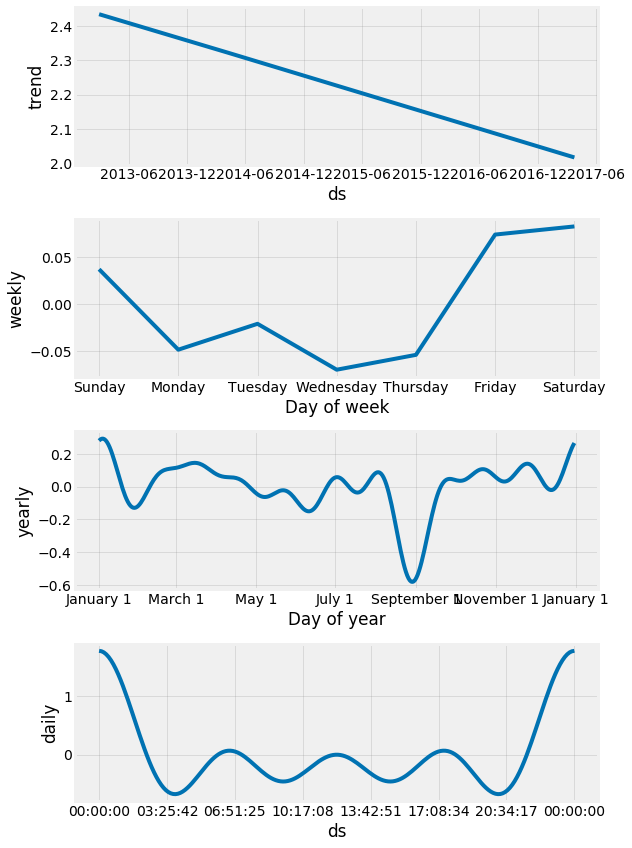

In [26]:
m.plot_components(bam)

In [27]:
df = pd.DataFrame()
df['ds'] = bam['ds']
df['yhat'] = bam['yhat']

In [28]:
fbtest.shape

(281, 1)

In [29]:
df.rename(columns={"ds": "Date", "yhat": "PM2.5"}, inplace = True)
df = df.set_index('Date')

In [30]:
df = df.loc['2016-03-26':'2016-12-31']

In [31]:
df.head()

,PM2.5
Date,
2016-03-26,4.081107
2016-03-27,4.029250
2016-03-28,3.937324
2016-03-29,3.959145
2016-03-30,3.904628


In [32]:
fbtest['PM2.5'] = np.log(fbtest['PM2.5'])
time['PM2.5'] = np.log(time['PM2.5'])


In [33]:
fbtest.tail()

,PM2.5
Date,
2016-12-27,3.593339
2016-12-28,4.191915
2016-12-29,3.944028
2016-12-30,5.316135
2016-12-31,5.656162


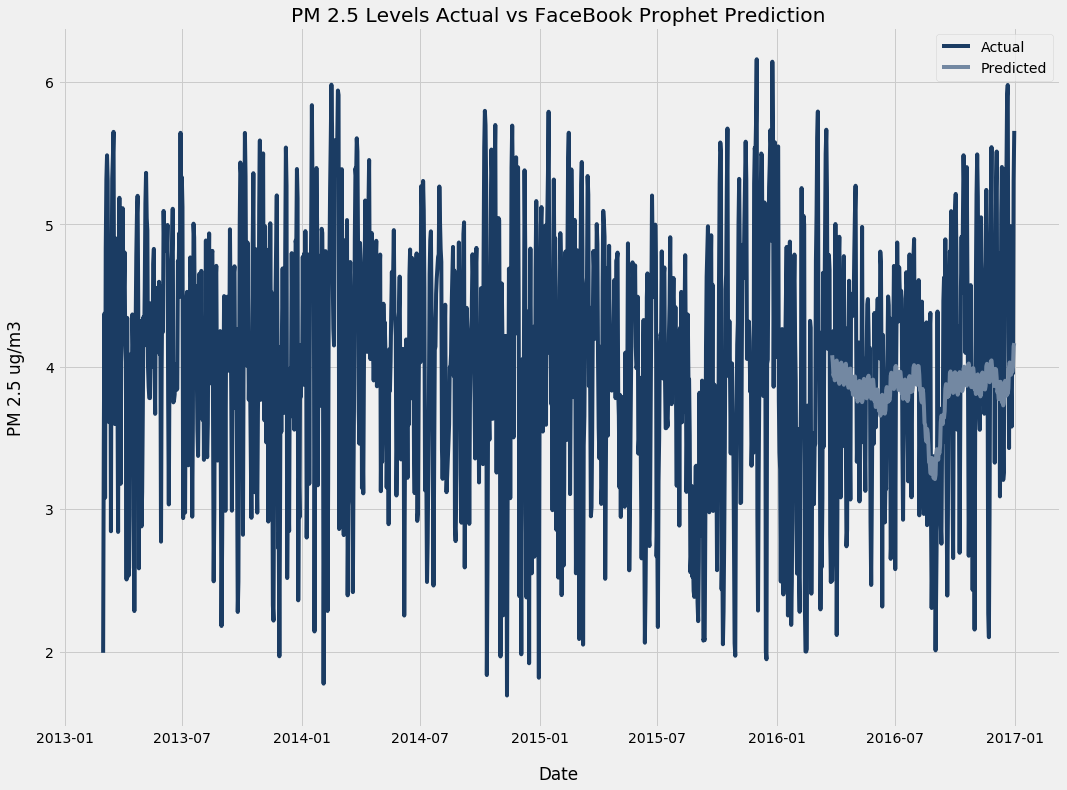

In [34]:
# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 80 , l= 25, n= 6))



fig, ax = plt.subplots(figsize=(16, 12))
sns.lineplot(y = 'PM2.5', x = time.index, data = time, label = 'Actual')
sns.lineplot(y = 'PM2.5', x = df.index, data = df, label = 'Predicted')
plt.title('PM 2.5 Levels Actual vs FaceBook Prophet Prediction')
plt.xlabel('Date', labelpad=20)
plt.ylabel('PM 2.5 ug/m3', labelpad=20)
plt.legend()
plt.show()

fig.savefig('PNG/FaceBookProphet.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )